In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet

In [3]:
%time train_test =  fastparquet.ParquetFile("../input/train_test.parq").to_pandas()

CPU times: user 22.5 s, sys: 12.5 s, total: 35 s
Wall time: 35 s


In [4]:
train_test.shape

(128867504, 15)

In [5]:
train_test.head()

date  istrain  item_nbr  onpromotion  store_nbr  unit_sales  \
index                                                                     
0     2013-01-01     True    103665           -1         25    2.079442   
1     2013-01-01     True    105574           -1         25    0.693147   
2     2013-01-01     True    105575           -1         25    1.098612   
3     2013-01-01     True    108079           -1         25    0.693147   
4     2013-01-01     True    108701           -1         25    0.693147   

       dcoilwtico  city  state  type  cluster  holiday  family  class  \
index                                                                   
0             NaN    20     13     3        1     True       5   2712   
1             NaN    20     13     3        1     True      12   1045   
2             NaN    20     13     3        1     True      12   1045   
3             NaN    20     13     3        1     True      12   1030   
4             NaN    20     13     3        1     True       9   2644   

       perishable  
index              
0               1  
1               0  
2               0  
3               0  
4               1

In [6]:
train=train_test[train_test['istrain']]
train.shape

(125497040, 15)

In [7]:
mean_target=train[['date','unit_sales']].groupby('date').mean()['unit_sales']

In [11]:
mean_target=pd.DataFrame(mean_target)

In [22]:
mean_target['year']=mean_target.index.map(lambda u: u.year)
mean_target['month']=mean_target.index.map(lambda u: u.year*100+u.month)

In [23]:
mean_target.groupby('year').mean()

unit_sales          month
year                           
2013    1.778110  201306.510989
2014    1.814865  201406.510989
2015    1.761454  201506.510989
2016    1.708703  201606.498630
2017    1.693506  201704.281938

In [24]:
mean_target.groupby('year').mean().std()

unit_sales      0.050043
month         157.408602
dtype: float64

In [25]:
mean_target.groupby('month').mean()

unit_sales  year
month                   
201301    1.761002  2013
201302    1.767654  2013
201303    1.789369  2013
201304    1.781714  2013
201305    1.781350  2013
201306    1.787117  2013
201307    1.762175  2013
201308    1.760741  2013
201309    1.776157  2013
201310    1.756517  2013
201311    1.761906  2013
201312    1.852833  2013
201401    1.819100  2014
201402    1.787293  2014
201403    1.867446  2014
201404    1.792224  2014
201405    1.792053  2014
201406    1.785277  2014
201407    1.811424  2014
201408    1.771279  2014
201409    1.822921  2014
201410    1.811802  2014
201411    1.825973  2014
201412    1.890292  2014
201501    1.776087  2015
201502    1.751594  2015
201503    1.753220  2015
201504    1.743233  2015
201505    1.770971  2015
201506    1.790160  2015
201507    1.774725  2015
201508    1.775377  2015
201509    1.770025  2015
201510    1.731232  2015
201511    1.715632  2015
201512    1.784109  2015
201601    1.737736  2016
201602    1.710555  2016
201603    1.696319  2016
201604    1.749626  2016
201605    1.725544  2016
201606    1.689492  2016
201607    1.690435  2016
201608    1.670014  2016
201609    1.685577  2016
201610    1.687387  2016
201611    1.695916  2016
201612    1.767395  2016
201701    1.703866  2017
201702    1.689595  2017
201703    1.692933  2017
201704    1.698175  2017
201705    1.693166  2017
201706    1.687060  2017
201707    1.695790  2017
201708    1.680121  2017

In [26]:
mean_target.groupby('month').mean().std()

unit_sales    0.050991
year          1.367527
dtype: float64

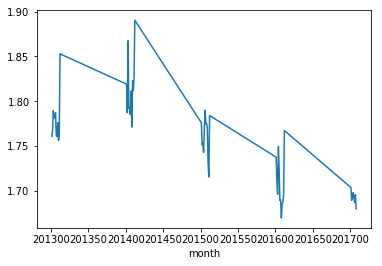

In [28]:
mean_target.groupby('month').mean()['unit_sales'].plot()

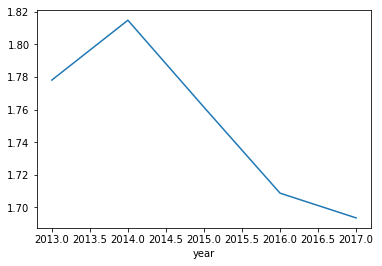

In [29]:
mean_target.groupby('year').mean()['unit_sales'].plot()

In [8]:
import gc
gc.collect()

25681